IMAGENES AUTOENCODER

By Elías Jesús Ventura-Molina

Ejemplo obtenido de : [Origen ejemplo](https://blog.keras.io/building-autoencoders-in-keras.html)

# Introducción

En este archivo se presenta dos ejemplos de autoenconder con imagenes. 
En el primer ejemplo se presenta un autoenconder básico, el cual, reconstruye su objetivo es reconstruir las imagenes. Este ejemplo esta diseñado para entender la estructura básica del autoenconder.
El segundo ejemplo se presenta el autoencoder denoise; reconstrucción  de imgenes con ruido.

# Autoenconder básico

Este ejemplo se trabaja con imagenes en un autoenconder; la salida es la reconstrucción de la entrada. Este autoenconder consiste de  una sola capa neuronal completamente conectada como codificador y una capa como decodificador.


## Preprocesamiento de los datos

In [ ]:
# Librerias requeridas
from keras.datasets import mnist
import numpy as np

# Se obiene los conjuntos de datos de entrenamieto y prueba
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalización de todos los valores entre 0 y 1 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanaremos las imágenes de 28x28 en vectores de tamaño 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Se muestra las dimensiones finales de cada set
print( "Dimensiones del set de entrenamiento" ,x_train.shape)
print( "Dimensiones del set de prueba" ,  x_test.shape)

Dimensiones del set de entrenamiento (60000, 784)
Dimensiones del set de prueba (10000, 784)


## Diseño del modelo

In [ ]:
# Librerias requeridas
import keras
from keras import layers

## CARACTERISTICAS DEL AUTOENCONDER 

# Es el tamaña del code ( la información despues de pasar por el coder )
encoding_dim = 32  # 32 floats -> considerando un factor de compresion de 24.5, asumiendo una entrada de 784 floats

# Tamaño de cada imagen
input_img = keras.Input(shape=(784,))
# "encoded" es la representacion del encoder. Se designa una capa
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" es la representacion del coder; reconstruye la entrada
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Se crea el modelo 
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# Se crea el modelo un modelo de codificador independiente:
encoder = keras.Model(input_img, encoded)

In [ ]:
# Además del modelo de decodificador independiente

# Se configura le entrada del encoder
encoded_input = keras.Input(shape=(encoding_dim,))
# Se obtiene la ultima capa del modelo del autoenconder
decoder_layer = autoencoder.layers[-1]
# Se crea el modelo del decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

## Ejecución del modelo

In [ ]:

#Ahora entrenemos nuestro codificador automático para reconstruir dígitos MNIST.

#Primero, configuraremos nuestro modelo para usar una pérdida de entropía cruzada binaria por píxel y el optimizador de Adam:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Ahora entrenemos nuestro codificador automático durante 50 épocas:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2719 - val_loss: 0.1890
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1705 - val_loss: 0.1524
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1431 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1208
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1182 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1063 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0995 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0975 - val_loss: 0.0955

## Resultados

In [ ]:
# Encode and decode alugunas imagenes digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

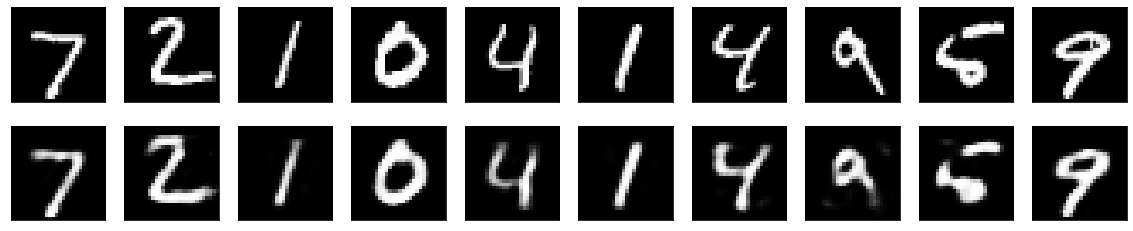

In [ ]:
# Se utiliza la siguiente libreria para visualiar
import matplotlib.pyplot as plt

n = 10  # Cantidad de digitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruccion de imagenes
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder denoise

Se implementa autoenconder convolucional para eliminar ruido de imágenes. Es simple: entrenaremos el autoencoder para mapear imágenes de dígitos ruidosos para limpiar imágenes de dígitos.

## Preprocesamiento de los datos

In [ ]:
#Librerias que se requieren
from keras.datasets import mnist
import numpy as np

# Se obiene los conjuntos de datos de entrenamieto y prueba
(x_train, _), (x_test, _) = mnist.load_data()

# Normalización de todos los valores entre 0 y 1 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanaremos las imágenes en matrices de 28x28 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
## Aplicamos una matriz de ruido gaussiano

noise_factor = 0.5 #Factor de ruido
# Aplicamos el ruido
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
# Acota los valores entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

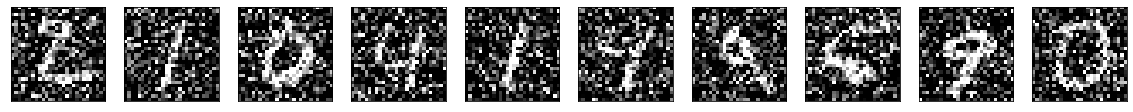

In [ ]:
#Ejemplo de imagenes con ruido

n = 10 #Imagenes a mostrar
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Diseño del modelo

In [ ]:
## CARACTERISTICAS DEL Autoencoder Convolucional

#Entrada del autoencoder
input_img = keras.Input(shape=(28, 28, 1))

# Sección de encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# En este punto la representación es (7, 7, 32)

# Sección de decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



## Ejecución del modelo

In [ ]:
# Se construye el modelo
autoencoder = keras.Model(input_img, decoded)
# Configuraremos nuestro modelo para usar una pérdida de entropía cruzada binaria por píxel y el optimizador de Adam:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard

# Entrenanmiento durante 100 épocas:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
  1/469 [..............................] - ETA: 0s - loss: 0.6963WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 3s 7ms/step - loss: 0.1748 - val_loss: 0.1200
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1149 - val_loss: 0.1099
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1081 - val_loss: 0.1052
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1052 - val_loss: 0.1033
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1034 - val_loss: 0.1020
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1021 - val_loss: 0.1010
Epoch 7/100
469/469 [==============================

## Resultados

In [ ]:
#Realizamos la prediccion
result = autoencoder.predict(x_test_noisy)


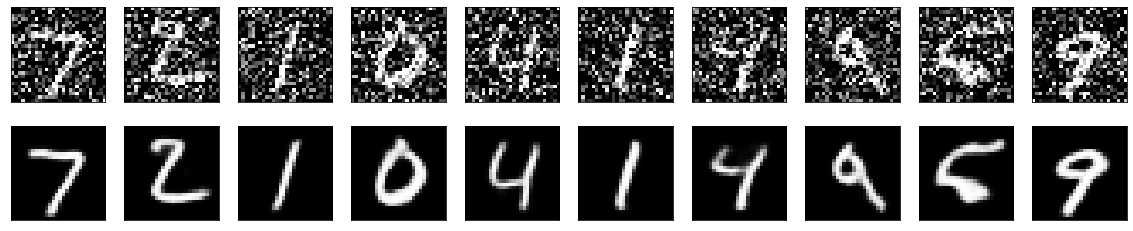

In [ ]:


import matplotlib.pyplot as plt

n = 10  # Se utiliza la siguiente libreria para visualiar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruccion de imagenes
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()